In [35]:

import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix 

import joblib 
import matplotlib.pyplot as plt 
import numpy as np 

In [36]:
# Loading the labeled dataset 
data = pd.read_csv('Dataset/Twitter_tamil_Analysis.csv') 

In [37]:
# Optionally, check for class imbalance and print class distribution 
print(data['sentiment'].value_counts())

Sad      509
Happy    506
Name: sentiment, dtype: int64


In [38]:
# Split the data into training and testing sets 
X = data['tweet'] 
y = data['sentiment'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
# Create pipelines for all four models 
rf_pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier(random_state=42)) 
svm_pipeline = make_pipeline(TfidfVectorizer(), SVC(random_state=42)) 
lr_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(random_state=42, 
max_iter=1000)) 
nb_pipeline = make_pipeline(TfidfVectorizer(), MultinomialNB()) 

In [40]:
 
# Hyperparameter tuning for Random Forest 
rf_param_grid = { 
    'randomforestclassifier__n_estimators': [100, 200], 
    'randomforestclassifier__max_depth': [None, 10, 20, 30], 
    'randomforestclassifier__min_samples_split': [2, 5, 10] 
} 

In [41]:

# Hyperparameter tuning for SVM 
svm_param_grid = { 
    'svc__C': [0.1, 1, 10], 
    'svc__kernel': ['linear', 'rbf'], 
    'svc__gamma': ['scale', 'auto'] 
} 

In [42]:
# Hyperparameter tuning for Logistic Regression 
lr_param_grid = { 
    'logisticregression__C': [0.1, 1, 10], 
} 

In [43]:
# Perform GridSearchCV for all models 
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1) 
svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy', 
n_jobs=-1) 
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1) 

In [44]:
# Fit the models 
rf_grid_search.fit(X_train, y_train) 
svm_grid_search.fit(X_train, y_train) 
lr_grid_search.fit(X_train, y_train) 
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [45]:
# Save the best models 
joblib.dump(rf_grid_search.best_estimator_, 'rf_sentiment_model.pkl') 
joblib.dump(svm_grid_search.best_estimator_, 'svm_sentiment_model.pkl') 
joblib.dump(lr_grid_search.best_estimator_, 'lr_sentiment_model.pkl') 
joblib.dump(nb_pipeline, 'nb_sentiment_model.pkl') 

['nb_sentiment_model.pkl']

In [46]:
# Extract the trained TfidfVectorizer from the Naive Bayes pipeline
tfidf_vectorizer = nb_pipeline.named_steps['tfidfvectorizer']

# Save the TfidfVectorizer for later use
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("TfidfVectorizer saved successfully!")


TfidfVectorizer saved successfully!


In [47]:
# Predictions 
rf_y_pred = rf_grid_search.best_estimator_.predict(X_test) 
svm_y_pred = svm_grid_search.best_estimator_.predict(X_test) 
lr_y_pred = lr_grid_search.best_estimator_.predict(X_test) 
nb_y_pred = nb_pipeline.predict(X_test) 

In [48]:
# Function to print metrics 
def print_metrics(y_true, y_pred, model_name): 
    accuracy = accuracy_score(y_true, y_pred) 
    precision = precision_score(y_true, y_pred, average='weighted') 
    recall = recall_score(y_true, y_pred, average='weighted') 
    f1 = f1_score(y_true, y_pred, average='weighted') 
     
    print(f"{model_name} Metrics:") 
    print(f"Accuracy: {accuracy:.2f}") 
    print(f"Precision: {precision:.2f}") 
    print(f"Recall: {recall:.2f}") 
    print(f"F1-Score: {f1:.2f}") 
    print("-" * 30) 
     
    print("Classification Report:\n", classification_report(y_true, y_pred)) 
     
    return accuracy, precision, recall, f1

In [49]:
# Function to plot confusion matrix 
def plot_confusion_matrix(y_true, y_pred, model_name): 
    cm = confusion_matrix(y_true, y_pred) 
    plt.figure(figsize=(6, 4)) 
    plt.matshow(cm, cmap='Blues', fignum=1) 
    plt.title(f'{model_name} Confusion Matrix') 
    plt.colorbar() 
    plt.ylabel('Actual') 
    plt.xlabel('Predicted') 
     
    # Annotating the cells 
    for i in range(len(cm)): 
        for j in range(len(cm[i])): 
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black') 
     
    plt.show() 

Random Forest Metrics:
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1-Score: 0.72
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Happy       0.70      0.76      0.73       101
         Sad       0.74      0.68      0.71       102

    accuracy                           0.72       203
   macro avg       0.72      0.72      0.72       203
weighted avg       0.72      0.72      0.72       203



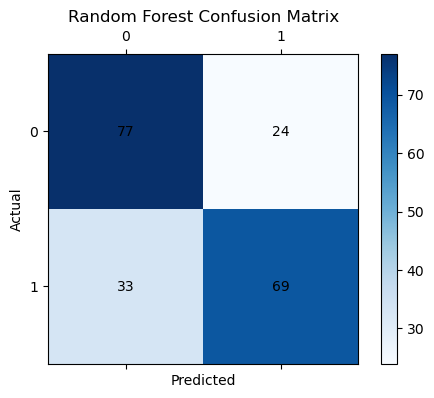

In [50]:
# Print metrics and plot confusion matrix for all models 
rf_metrics = print_metrics(y_test, rf_y_pred, "Random Forest") 
plot_confusion_matrix(y_test, rf_y_pred, "Random Forest") 

SVM Metrics:
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1-Score: 0.75
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Happy       0.74      0.77      0.76       101
         Sad       0.77      0.74      0.75       102

    accuracy                           0.75       203
   macro avg       0.75      0.75      0.75       203
weighted avg       0.75      0.75      0.75       203



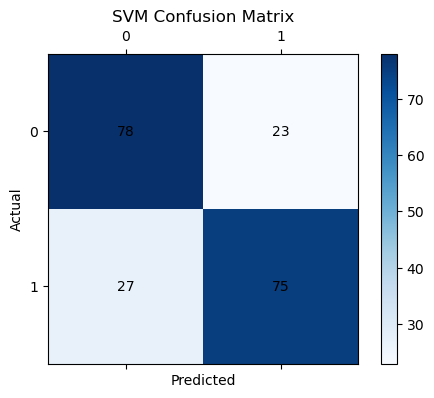

In [51]:

svm_metrics = print_metrics(y_test, svm_y_pred, "SVM") 
plot_confusion_matrix(y_test, svm_y_pred, "SVM") 

Logistic Regression Metrics:
Accuracy: 0.73
Precision: 0.74
Recall: 0.73
F1-Score: 0.73
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Happy       0.72      0.77      0.74       101
         Sad       0.76      0.70      0.72       102

    accuracy                           0.73       203
   macro avg       0.74      0.73      0.73       203
weighted avg       0.74      0.73      0.73       203



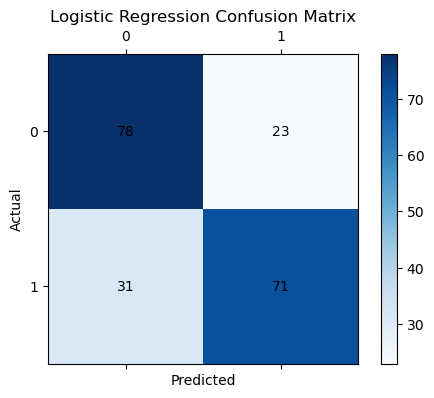

In [52]:
lr_metrics = print_metrics(y_test, lr_y_pred, "Logistic Regression") 
plot_confusion_matrix(y_test, lr_y_pred, "Logistic Regression")

Naive Bayes Metrics:
Accuracy: 0.73
Precision: 0.75
Recall: 0.73
F1-Score: 0.73
------------------------------
Classification Report:
               precision    recall  f1-score   support

       Happy       0.69      0.84      0.76       101
         Sad       0.80      0.63      0.70       102

    accuracy                           0.73       203
   macro avg       0.75      0.73      0.73       203
weighted avg       0.75      0.73      0.73       203



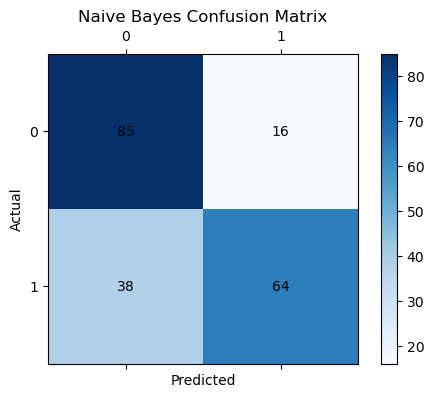

In [53]:
nb_metrics = print_metrics(y_test, nb_y_pred, "Naive Bayes") 
plot_confusion_matrix(y_test, nb_y_pred, "Naive Bayes")

In [54]:
# Combine metrics for plotting 
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Naive Bayes'] 
accuracies = [rf_metrics[0], svm_metrics[0], lr_metrics[0], nb_metrics[0]] 
precisions = [rf_metrics[1], svm_metrics[1], lr_metrics[1], nb_metrics[1]] 
recalls = [rf_metrics[2], svm_metrics[2], lr_metrics[2], nb_metrics[2]] 
f1_scores = [rf_metrics[3], svm_metrics[3], lr_metrics[3], nb_metrics[3]] 

<BarContainer object of 4 artists>

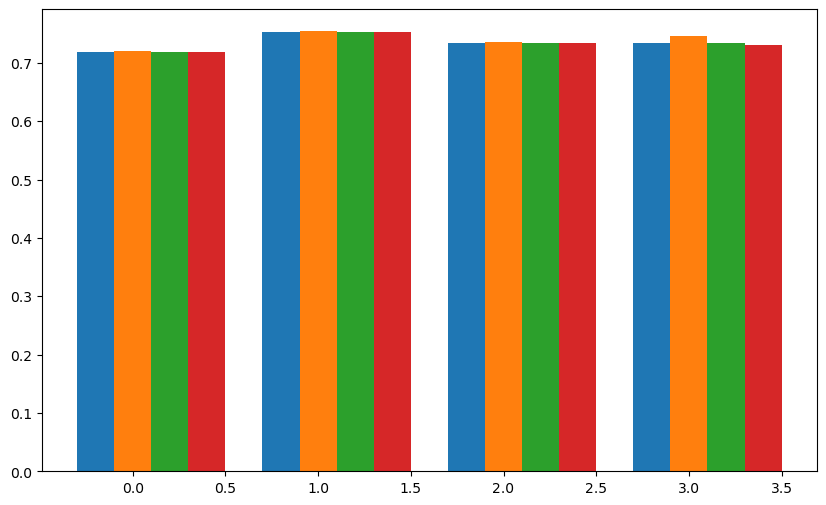

In [55]:
 
# Plot metrics 
x = np.arange(len(models)) 
width = 0.2 
fig, ax = plt.subplots(figsize=(10, 6)) 
ax.bar(x - width, accuracies, width, label='Accuracy') 
ax.bar(x, precisions, width, label='Precision') 
ax.bar(x + width, recalls, width, label='Recall') 
ax.bar(x + 2*width, f1_scores, width, label='F1-Score') 

In [56]:
# Add labels, title, and legend 
ax.set_xlabel('Models') 
ax.set_ylabel('Scores') 
ax.set_title('Comparison of Models on Telugu Sentiment Analysis') 
ax.set_xticks(x) 
ax.set_xticklabels(models) 
ax.legend() 
 
plt.tight_layout() 
plt.show()

<Figure size 640x480 with 0 Axes>